In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import folium
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.colors as colors
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from helpers import *
from ipywidgets import SelectMultiple, RadioButtons, interact, Layout
%load_ext autoreload

In [220]:
# World countries names from geopandas
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries_world = set(world_df['name'])

## Global income inequality

In [226]:
import tslearn.utils
from tslearn.clustering import TimeSeriesKMeans

In [227]:
# read dataset
inequality = pd.read_pickle("pickle/inequality_ref.pkl")
inequality.head()

0           
Percentile   Poor50 Top1 Top10
Area    Year                  
Albania 1961    0.0  0.0   0.0
        1962    0.0  0.0   0.0
        1963    0.0  0.0   0.0
        1964    0.0  0.0   0.0
        1965    0.0  0.0   0.0

In [228]:
def set_nan(x):
    if x == 0:
        return np.nan
    else:
        return x

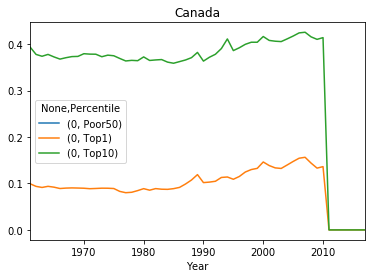

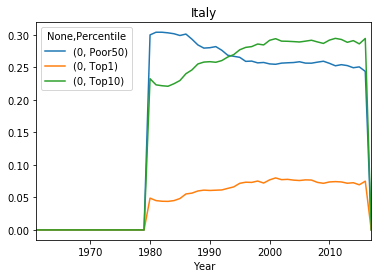

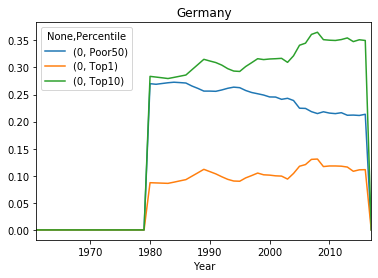

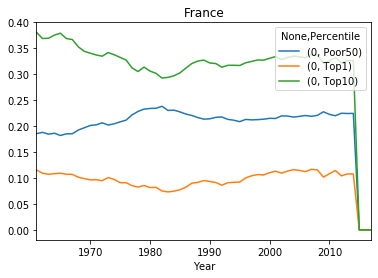

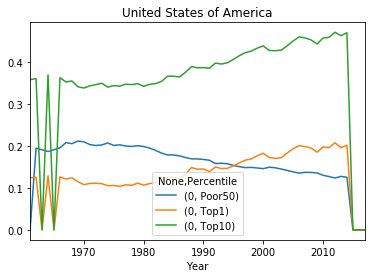

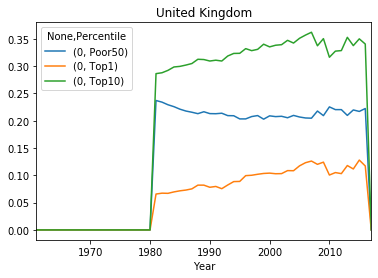

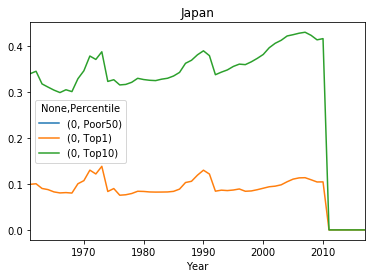

In [230]:
# plot time series for different countries
countries = ['Canada','Italy','Germany','France','United States of America','United Kingdom','Japan']
for c in countries:
    df = inequality.reset_index().set_index(['Area'])
    df = df.loc[c,].set_index('Year')
    df.plot.line()
    plt.title(c)

In [231]:
# create time series list
ts_dataset = list()
years = range(1980,2018)
countries = inequality.reset_index().Area.unique()
countries_cluster = []

for c in countries:
    ts = inequality.reset_index().set_index(['Area'])
    ts = ts.loc[c,].set_index('Year')
    ts = ts.loc[years,].fillna(method='ffill').fillna(method='bfill')
    if ts.isna().values.any() == False:
        countries_cluster = countries_cluster + [c]
    else:
        continue
    ts_dataset.append(ts.values)

In [232]:
# create time series dataset
ts_dataset = tslearn.utils.to_time_series_dataset(ts_dataset)

In [246]:
# compute kmeans clustering
kmeans = tslearn.clustering.TimeSeriesKMeans(metric='dtw',n_clusters=3)
clusters = kmeans.fit_predict(ts_dataset)

In [247]:
clusters = pd.Series(clusters)
clusters.index = countries_cluster

In [251]:
clusters

Albania                     2
Algeria                     0
Angola                      0
Austria                     2
Belgium                     2
                           ..
United States of America    1
Yemen                       0
Zambia                      0
Zimbabwe                    0
eSwatini                    0
Length: 104, dtype: int64